# PCA
In this notebook where we will explore one of the most powerful techniques in machine learning: Principal Component Analysis (PCA). PCA is a widely used unsupervised learning technique that allows us to identify patterns in high-dimensional data and to reduce its dimensionality while retaining as much information as possible.
In this notebook , we are going to use the "Housing Prices" dataset.


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
### Import Dataset and EDA
data = 'house_prices.csv'
df = pd.read_csv(data)

In [4]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [5]:
# Feature Engineering
categories = df.dtypes[df.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df[categories])
df = pd.concat([df, df_dummy], axis=1)
df_final = df.drop(columns=categories)

In [6]:
df_final=df_final.set_index('Home')

## Convert the Regression task to classification

The objective of this notebook is to transform the "price" column, which is currently numeric, into three distinct classes based on their value. Specifically, we will divide the values into three categories: "Expensive" for values above 140k, "Mid" for values between 110k and 140k, and "Cheap" for values below 110k. This categorization will allow us to analyze and model the data in a more meaningful way.
- Expensive : >140k
- Mid : >110k and <140k
- Cheap : < 110k

In [7]:
# Define the three price categories
def categorize_price(price):
    if price >= 140000:
        return 'Expensive'
    elif price >= 110000:
        return 'Mid'
    else:
        return 'Cheap'

# Apply the categorize_price function to create the new column
df_final['Price_Category'] = df_final['Price'].apply(categorize_price)
df_final=df_final.drop('Price',axis=1)

In [9]:
df_final.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West,Price_Category
Home,,,,,,,,,,
1,1790,2,2,2,1,0,1,0,0,Mid
2,2030,4,2,3,1,0,1,0,0,Mid
3,1740,3,2,1,1,0,1,0,0,Mid
4,1980,3,2,3,1,0,1,0,0,Cheap
5,2130,3,3,3,1,0,1,0,0,Mid


In [10]:
# Basic Statistics
df_final.iloc[:,:-1].describe()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2000.937500,3.023438,2.445312,2.578125,0.671875,0.328125,0.351562,0.343750,0.304688
std,211.572431,0.725951,0.514492,1.069324,0.471376,0.471376,0.479334,0.476825,0.462084
min,1450.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1880.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2000.000000,3.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2140.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2590.000000,5.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Boxplots by output labels/classes

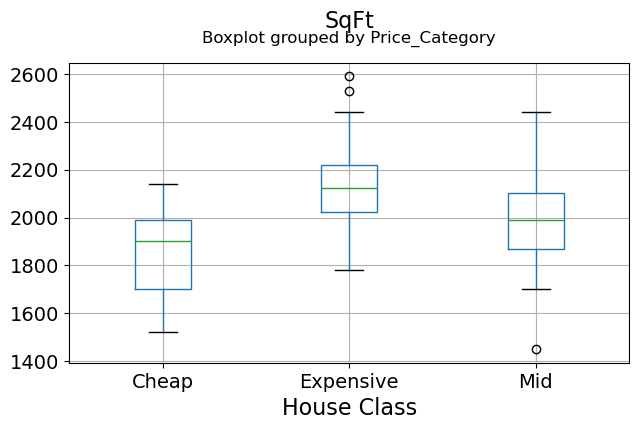

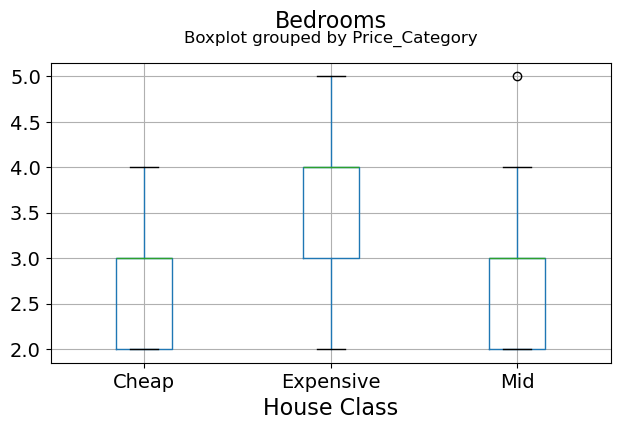

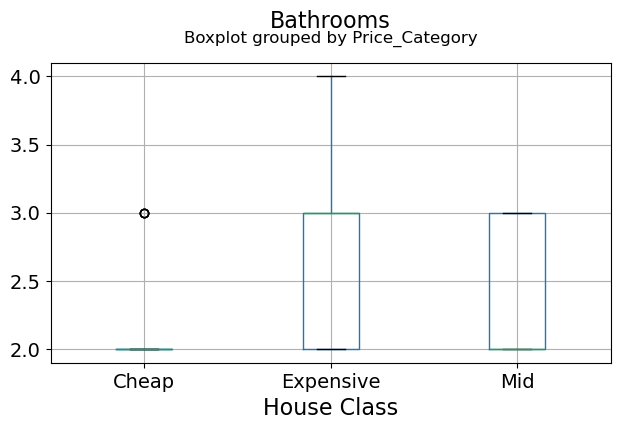

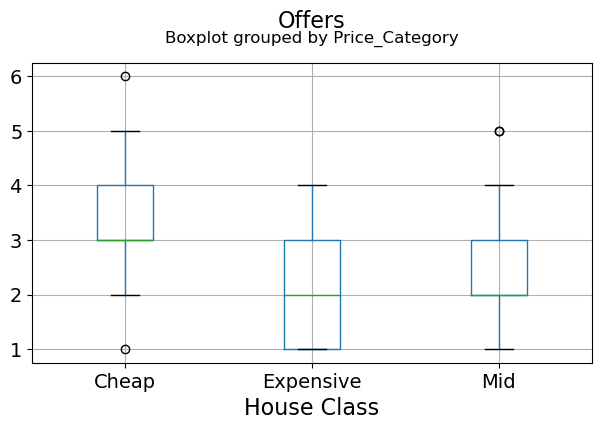

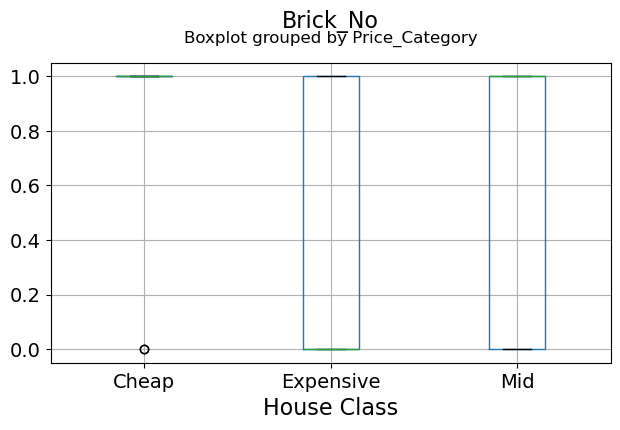

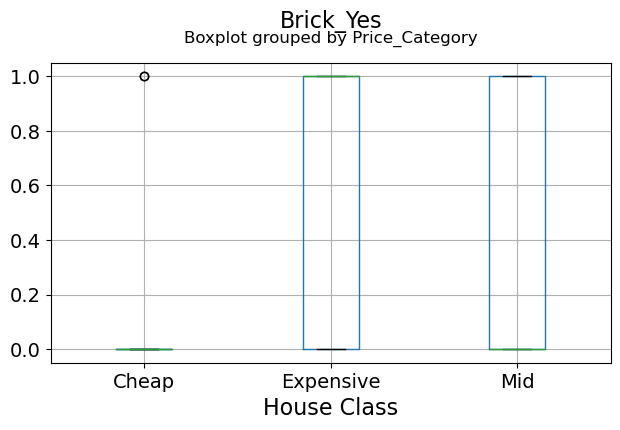

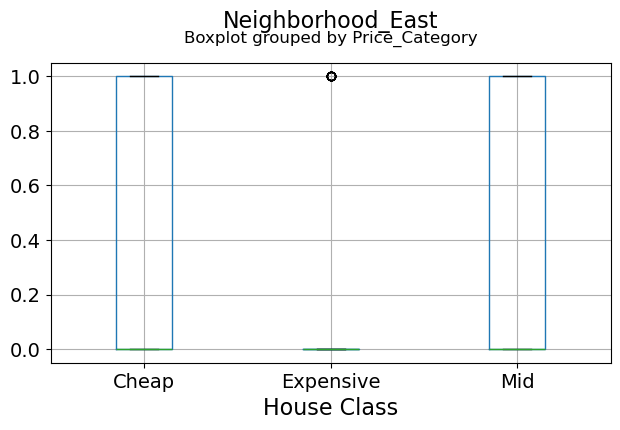

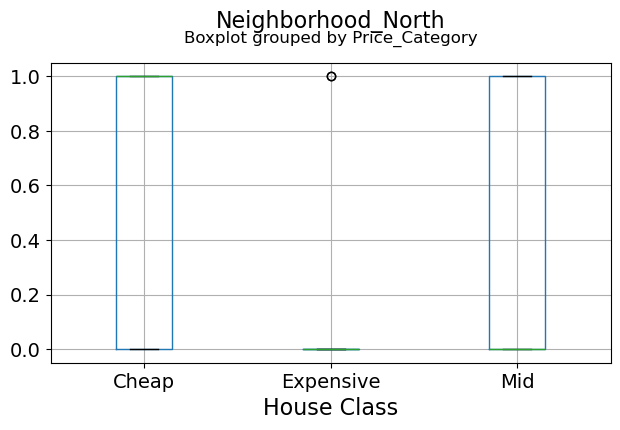

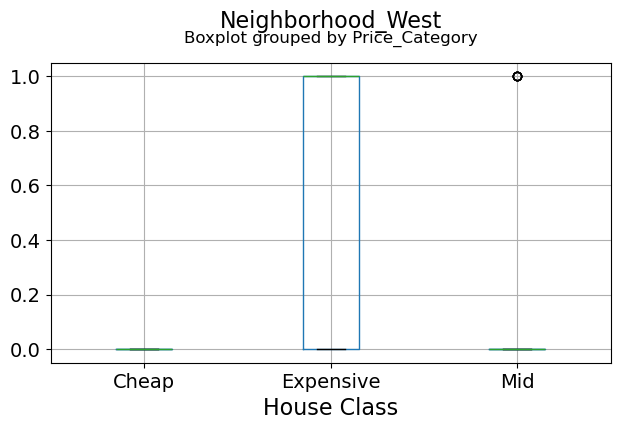

In [11]:
for c in df_final.columns[:-1]:
    df_final.boxplot(c,by='Price_Category',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("House Class", fontsize=16)

We can observe that certain features strongly differentiate the level of houses. Specifically, SqFt produce boxplots with distinct median values that separate the different wine classes in a clear way. This provides a clear indication of the classification of the price categories based on these features.

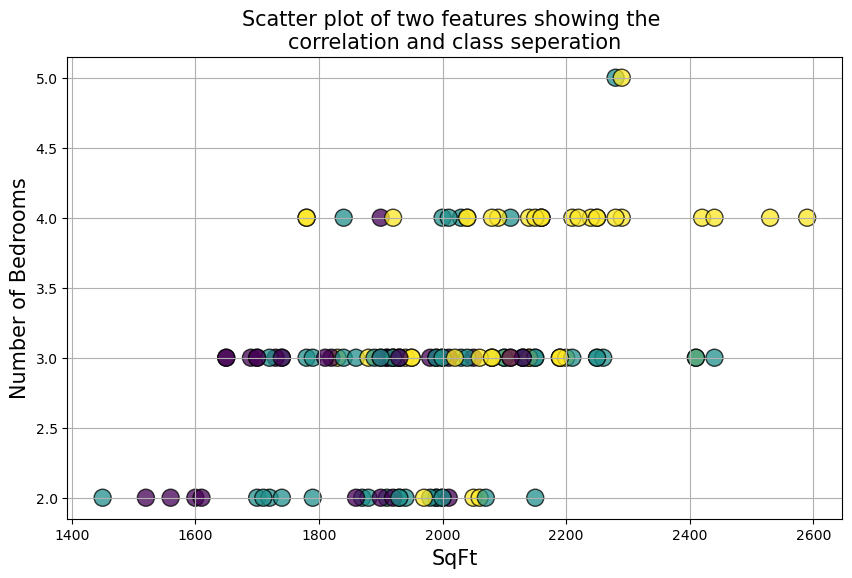

In [12]:
scale_mapper = {"Cheap":1, "Mid":2, "Expensive":3}
df_final["Scale"] = df_final["Price_Category"].replace(scale_mapper)


plt.figure(figsize=(10,6))
plt.scatter(df_final['SqFt'],df_final['Bedrooms'],c=df_final['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("SqFt",fontsize=15)
plt.ylabel("Number of Bedrooms",fontsize=15)
plt.show()

In [13]:
df_final.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West,Price_Category,Scale
Home,,,,,,,,,,,
1,1790,2,2,2,1,0,1,0,0,Mid,2
2,2030,4,2,3,1,0,1,0,0,Mid,2
3,1740,3,2,1,1,0,1,0,0,Mid,2
4,1980,3,2,3,1,0,1,0,0,Cheap,1
5,2130,3,3,3,1,0,1,0,0,Mid,2


## Features independent?

Let's check the correlation between features using the heatmap

SqFt                   int64
Bedrooms               int64
Bathrooms              int64
Offers                 int64
Brick_No               uint8
Brick_Yes              uint8
Neighborhood_East      uint8
Neighborhood_North     uint8
Neighborhood_West      uint8
Price_Category        object
Scale                  int64
dtype: object
      SqFt  Bedrooms  Bathrooms  Offers  Brick_No  Brick_Yes  \
Home                                                           
1     1790         2          2       2         1          0   
2     2030         4          2       3         1          0   
3     1740         3          2       1         1          0   
4     1980         3          2       3         1          0   
5     2130         3          3       3         1          0   

      Neighborhood_East  Neighborhood_North  Neighborhood_West  Scale  
Home                                                                   
1                     1                   0                  0      2  
2 

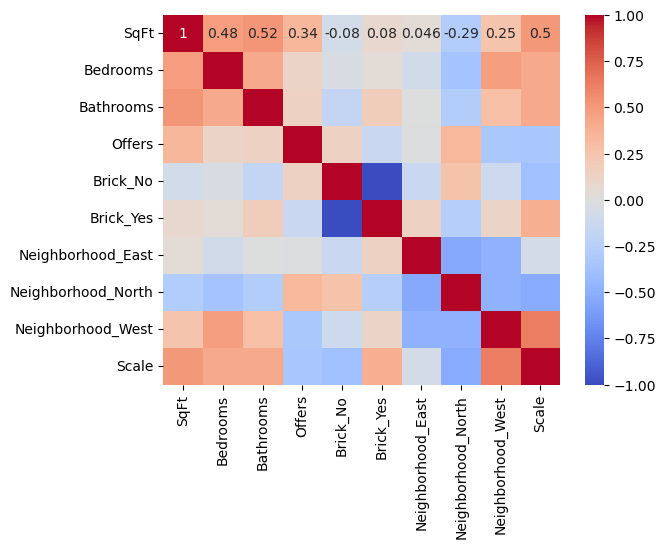

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Check the data types of all columns
print(df_final.dtypes)

# Ensure df_final only includes numeric columns
df_final_numeric = df_final.select_dtypes(include=[np.number])

# Optionally, inspect the selected numeric data
print(df_final_numeric.head())

# Compute the correlation matrix
df_final_corr = df_final_numeric.corr(numeric_only=True)

# Plot the heatmap
sns.heatmap(df_final_corr, annot=True, cmap='coolwarm')
plt.show()

## Principal Component Analysis

First we need to perform Preprocessing and remove the target from the training set

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df_final.drop(['Price_Category','Scale'],axis=1)
y = df_final['Scale']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=df_final.columns[:-2])
dfx.head(10)

,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,-1.000916,-1.415327,-0.868939,-0.542769,0.698836,-0.698836,1.358103,-0.723747,-0.661968
1,0.137904,1.350503,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
2,-1.238171,-0.032412,-0.868939,-1.481614,0.698836,-0.698836,1.358103,-0.723747,-0.661968
3,-0.099350,-0.032412,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
4,0.612413,-0.032412,1.082362,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
5,-1.048367,-0.032412,-0.868939,-0.542769,0.698836,-0.698836,-0.736321,1.381699,-0.661968
6,-0.811113,-0.032412,1.082362,0.396075,-1.430950,1.430950,-0.736321,-0.723747,1.510646
7,0.754765,1.350503,-0.868939,-0.542769,0.698836,-0.698836,-0.736321,-0.723747,1.510646
8,0.517511,1.350503,-0.868939,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968
9,-1.285622,-0.032412,1.082362,0.396075,0.698836,-0.698836,1.358103,-0.723747,-0.661968


### Performing PCA

In [40]:

from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)


### Plot the explained variance ratio

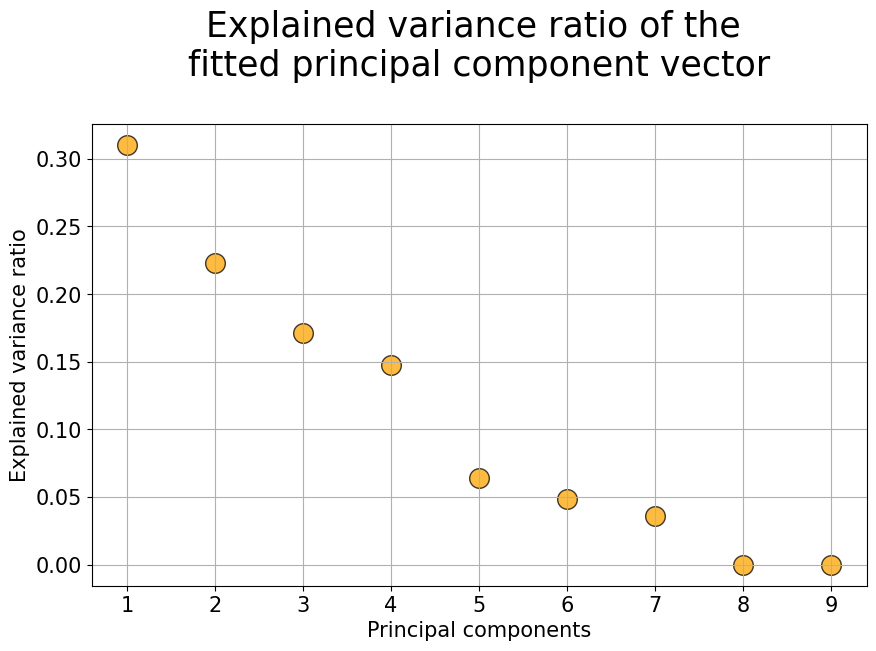

In [41]:

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 9 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 31% of the variance and the second principal component contains 22% of the variance. Together, the two components contain 55% of the information.

In [44]:
pca.explained_variance_ratio_

array([3.10387993e-01, 2.22640872e-01, 1.71086076e-01, 1.47624214e-01,
       6.39872313e-02, 4.83729428e-02, 3.59006704e-02, 5.63586514e-33,
       6.74121178e-34])

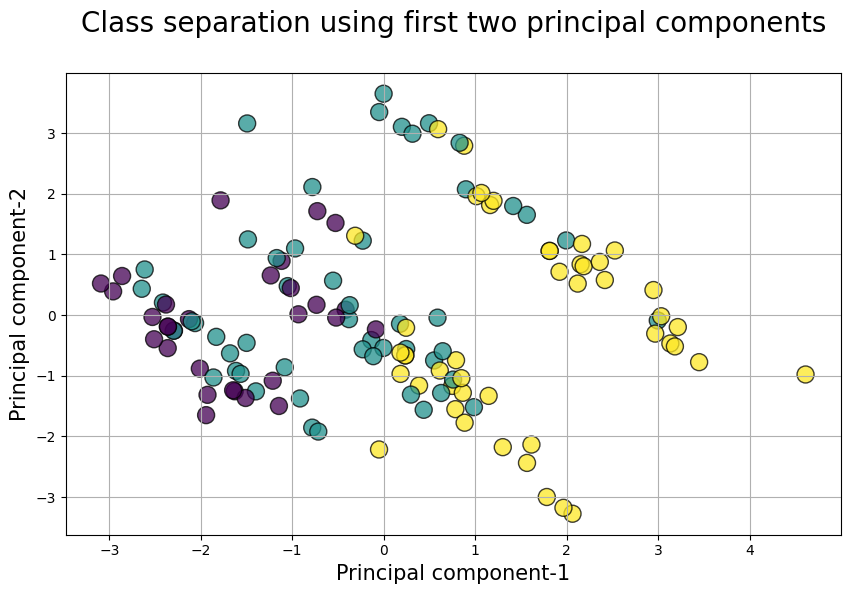

In [42]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df_final['Scale'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()